In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Tentukan direktori dasar

base_dir = '/content/drive/MyDrive/UANG CNN'

In [ ]:
# Menentukan direktori training, validation, dan testing

test_dir = os.path.join(base_dir, 'testing')
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
# Buat direktori isi bahan di dalam direktori testing

test_seratus_dir = os.path.join(test_dir, 'seratus')
test_limapuluh_dir = os.path.join(test_dir, 'limapuluh')

# Print jumlah data di setiap direktori
print('\nJumlah Data Test Tiap Kelas:')
print('Jumlah gambar uang 100.000:', len(os.listdir(test_seratus_dir)))
print('Jumlah gambar uang 50.000:', len(os.listdir(test_limapuluh_dir)))


Jumlah Data Test Tiap Kelas:
Jumlah gambar uang 100.000: 100
Jumlah gambar uang 50.000: 100


In [ ]:
# Buat direktori isi bahan di dalam direktori training

train_seratus_dir = os.path.join(train_dir, 'seratus/')
train_limapuluh_dir = os.path.join(train_dir, 'limapuluh/')

# Print jumlah data di setiap direktori
print('Jumlah Data Train Tiap Kelas:')
print('Jumlah gambar uang 100.000:', len(os.listdir(train_seratus_dir)))
print('Jumlah gambar uang 50.000:', len(os.listdir(train_limapuluh_dir)))

Jumlah Data Train Tiap Kelas:
Jumlah gambar uang 100.000: 100
Jumlah gambar uang 50.000: 100


In [ ]:
# Buat direktori isi bahan di dalam direktori validation

validation_seratus_dir = os.path.join(validation_dir, 'seratus/')
validation_limapuluh_dir = os.path.join(validation_dir, 'limapuluh/')

# Print jumlah data di setiap direktori
print('\nJumlah Data Validation Tiap Kelas:')
print('Jumlah gambar uang 100.000:', len(os.listdir(validation_seratus_dir)))
print('Jumlah gambar uang 50.000:', len(os.listdir(validation_limapuluh_dir)))


Jumlah Data Validation Tiap Kelas:
Jumlah gambar uang 100.000: 100
Jumlah gambar uang 50.000: 100


In [ ]:
# Print jumlah data di setiap direktori (Menyiapkan Dataset)
print('Jumlah Data Testing Seratus:', len(os.listdir(test_seratus_dir)))
print('Jumlah Data Testing Limapuluh:', len(os.listdir(test_limapuluh_dir)))

print('Jumlah Data Training Seratus:', len(os.listdir(train_seratus_dir)))
print('Jumlah Data Training Limapuluh:', len(os.listdir(train_limapuluh_dir)))

print('Jumlah Data Validation Seratus:', len(os.listdir(validation_seratus_dir)))
print('Jumlah Data Validation Limapuluh:', len(os.listdir(validation_limapuluh_dir)))

Jumlah Data Testing Seratus: 100
Jumlah Data Testing Limapuluh: 100
Jumlah Data Training Seratus: 100
Jumlah Data Training Limapuluh: 100
Jumlah Data Validation Seratus: 100
Jumlah Data Validation Limapuluh: 100


In [ ]:
pip install tensorflow

In [ ]:
# Data / Tahap Proses

import tensorflow as tf #Library klasifikasi
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator #training

In [ ]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3,
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3,
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training -True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(200, activation = 'relu'),
          tf.keras.layers.Dropout (0.3, seed=112),
          tf.keras.layers.Dense(500, activation = 'relu'),
          tf.keras.layers.Dropout(0.5, seed=112),
          tf.keras.layers.Dense(2, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = 6,
          epochs = 25,
          validation_data = val_generator,
          validation_steps = 1,
          verbose = 1,
          callbacks = [callbacks]
)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4486 - loss: 0.8518 - val_accuracy: 0.8000 - val_loss: 0.6448
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4243 - loss: 0.7426 - val_accuracy: 0.7000 - val_loss: 0.6550
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6443 - loss: 0.6465 - val_accuracy: 0.6000 - val_loss: 0.7917
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.5417 - loss: 0.7336 - val_accuracy: 0.7000 - val_loss: 0.4774
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5052 - loss: 0.7189 - val_accuracy: 0.6000 - val_loss: 0.6509
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6150 - loss: 0.6324 - val_accuracy: 0.7000 - val_loss: 0.6026
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 961ms/step - accuracy: 0.6826 - loss: 0.5810 - val_accuracy: 0.8000 - val_loss: 0.4271
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.6750 - loss: 0.6339 - val_accuracy: 0.9000 - val_loss: 0.3568
Epo

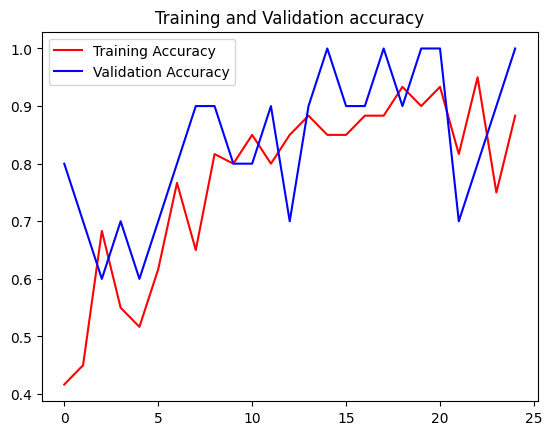

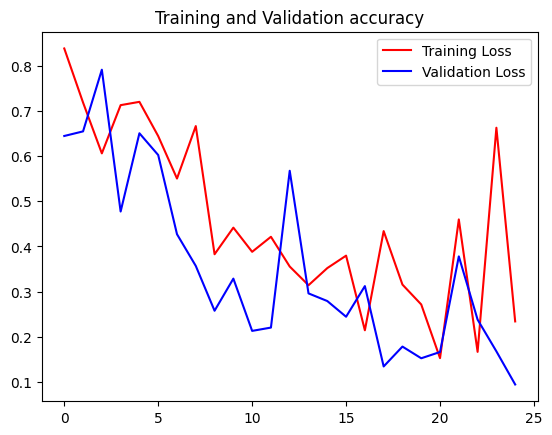

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

Saving UANG RUPIAH 50K (57).jpeg to UANG RUPIAH 50K (57).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
UANG RUPIAH 50K (57).jpeg
This image belongs to class limapuluh


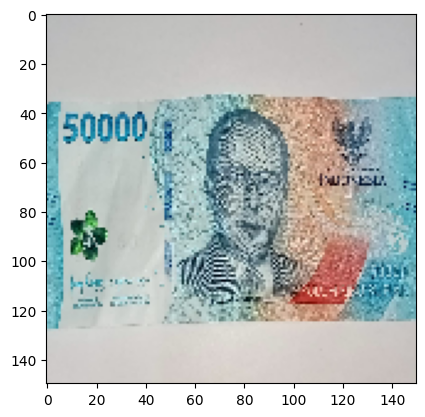

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] --1.:
      print('This image belongs to class', class_list[j-1])
      break

In [ ]:
print(class_list)

['seratus', 'limapuluh']


Saving UANG RUPOAH 100K  (112).jpeg to UANG RUPOAH 100K  (112) (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
UANG RUPOAH 100K  (112) (1).jpeg
seratus


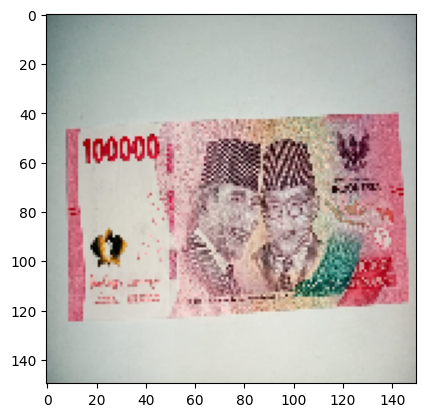

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
import os

# ... (Kode sebelumnya untuk memuat dan menyiapkan model) ...

uploaded = files.upload()

for fn in uploaded.keys():

  # Memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)  # Menampilkan gambar
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=100)

  print(fn)  # Mencetak nama file

  # Mendapatkan indeks kelas yang diprediksi
  predicted_class_index = np.argmax(classes[0])

  # Memetakan indeks ke label kelas dengan ambang batas
  if predicted_class_index == 0 and classes[0][0] > 0.8:  # Ambang batas untuk 'limapuluh'
    print('limapuluh')
  elif predicted_class_index == 1 and classes[0][1] > 0.8:  # Ambang batas untuk 'seratus'
    print('seratus')
  else:
    print("Tidak yakin atau kelas lain")

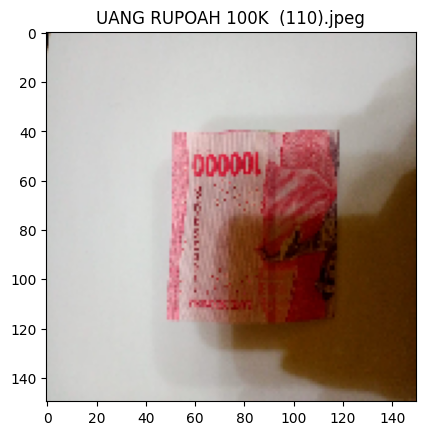

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
UANG RUPOAH 100K  (110).jpeg
seratus


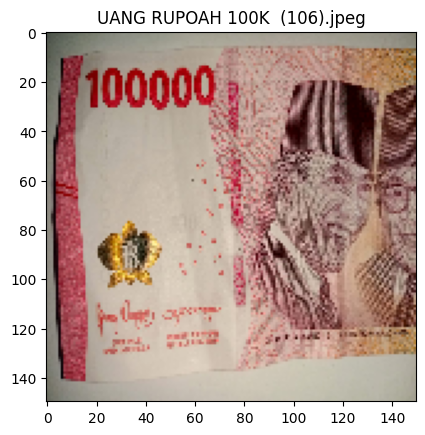

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
UANG RUPOAH 100K  (106).jpeg
seratus


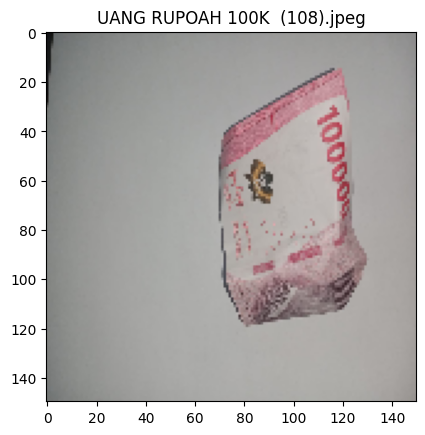

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
UANG RUPOAH 100K  (108).jpeg
seratus


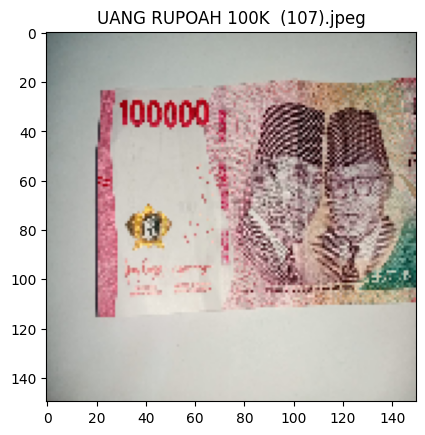

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
UANG RUPOAH 100K  (107).jpeg
seratus


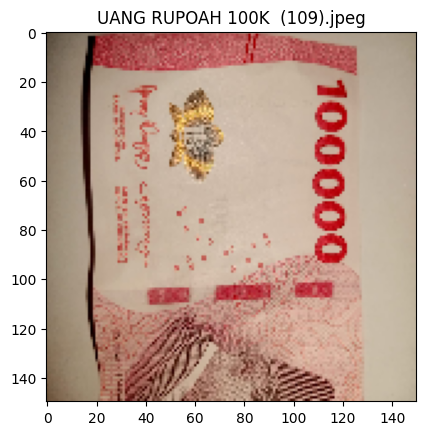

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
UANG RUPOAH 100K  (109).jpeg
seratus


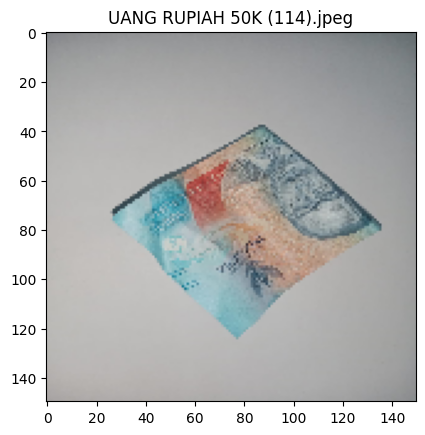

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
UANG RUPIAH 50K (114).jpeg
seratus


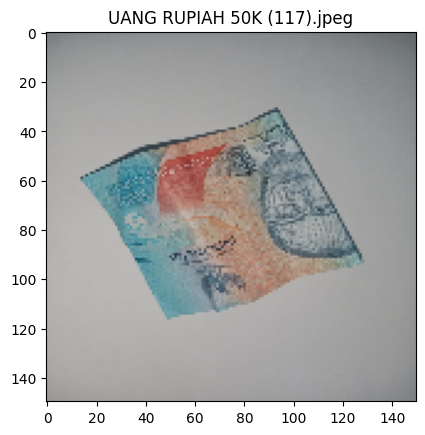

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
UANG RUPIAH 50K (117).jpeg
seratus


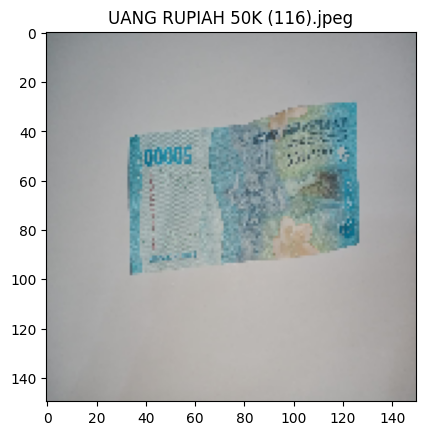

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
UANG RUPIAH 50K (116).jpeg
limapuluh


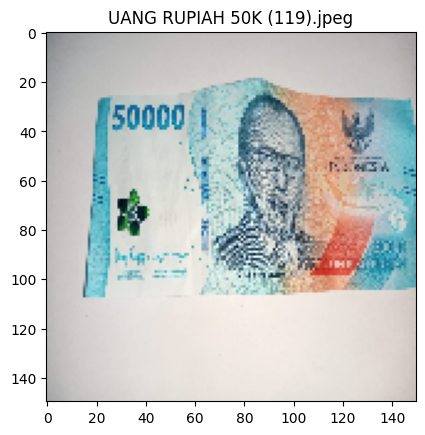

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
UANG RUPIAH 50K (119).jpeg
seratus


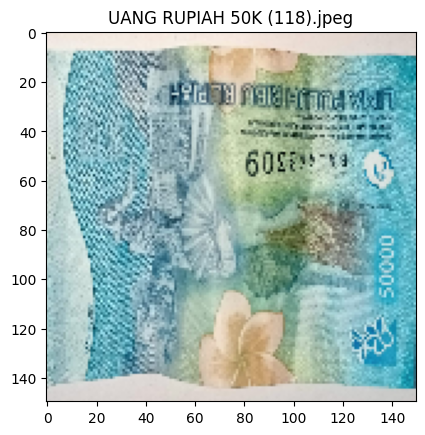

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
UANG RUPIAH 50K (118).jpeg
limapuluh


In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

dir_path = '/content/drive/MyDrive/UANG CNN/testing acak'

for i in os.listdir(dir_path):
  # predicting images
  path = os.path.join(dir_path, i)  # Construct full path
  img = image.load_img(path, target_size=(150, 150))

  # Display the image
  plt.figure()
  plt.imshow(img)
  plt.title(i)  # Set title as filename
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  val = model.predict(images)  # Get prediction

  print(i)  # Print the actual filename

  # Check prediction and print class
  predicted_class_index = np.argmax(val[0])

  # Get predicted class index
  if predicted_class_index == 0:
    print('limapuluh')
  else:
    print('seratus')